# Linear Regression

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('./data/weight-height.csv')

In [3]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


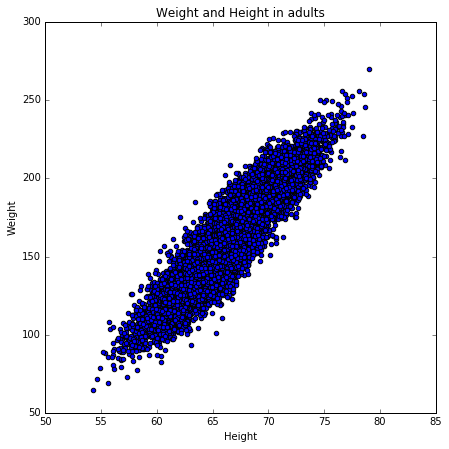

In [4]:
df.plot(kind = 'scatter',
        figsize = (7, 7),
        x = 'Height',
        y = 'Weight',
        title = 'Weight and Height in adults')

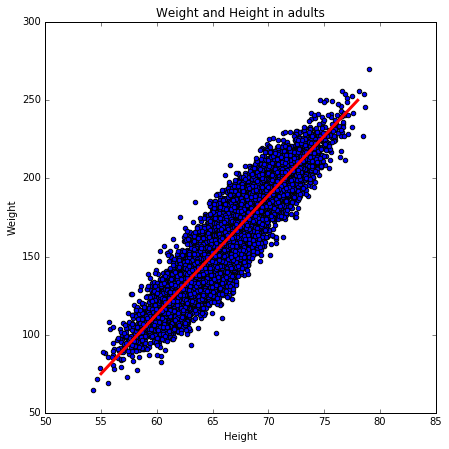

In [5]:
df.plot(kind = 'scatter',
        figsize = (7, 7),
        x = 'Height',
        y = 'Weight',
        title = 'Weight and Height in adults')

# Here we're plotting the red line 'by hand' with fixed values
# We'll try to learn this line with an algorithm below
plt.plot([55, 78], [75, 250], color='red', linewidth=3)

In [6]:
def line(x, w=0, b=0):
    return x * w + b

In [7]:
x = np.linspace(55, 80, 100)

In [8]:
x

array([ 55.        ,  55.25252525,  55.50505051,  55.75757576,
        56.01010101,  56.26262626,  56.51515152,  56.76767677,
        57.02020202,  57.27272727,  57.52525253,  57.77777778,
        58.03030303,  58.28282828,  58.53535354,  58.78787879,
        59.04040404,  59.29292929,  59.54545455,  59.7979798 ,
        60.05050505,  60.3030303 ,  60.55555556,  60.80808081,
        61.06060606,  61.31313131,  61.56565657,  61.81818182,
        62.07070707,  62.32323232,  62.57575758,  62.82828283,
        63.08080808,  63.33333333,  63.58585859,  63.83838384,
        64.09090909,  64.34343434,  64.5959596 ,  64.84848485,
        65.1010101 ,  65.35353535,  65.60606061,  65.85858586,
        66.11111111,  66.36363636,  66.61616162,  66.86868687,
        67.12121212,  67.37373737,  67.62626263,  67.87878788,
        68.13131313,  68.38383838,  68.63636364,  68.88888889,
        69.14141414,  69.39393939,  69.64646465,  69.8989899 ,
        70.15151515,  70.4040404 ,  70.65656566,  70.90

In [9]:
yhat = line(x, w = 0, b = 0)

In [10]:
yhat

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

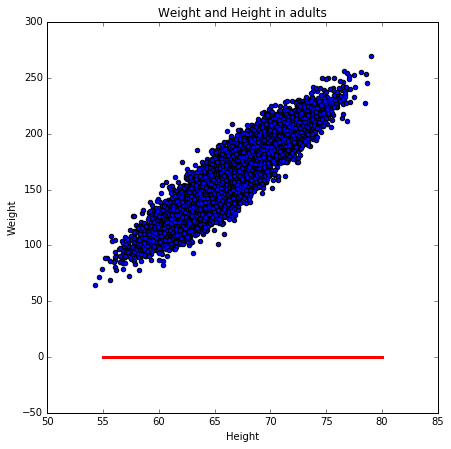

In [11]:
df.plot(kind = 'scatter',
        figsize = (7, 7),
        x = 'Height',
        y = 'Weight',
        title = 'Weight and Height in adults')
plt.plot(x, yhat, color='red', linewidth=3)

### Cost Function

In [12]:
def mean_squared_error(y_true, y_pred):
    s = (y_true - y_pred) ** 2
    return s.mean()

In [13]:
X = df[['Height']].values
y_true = df['Weight'].values

In [14]:
y_true

array([ 241.89356318,  162.31047252,  212.74085556, ...,  128.47531878,
        163.85246135,  113.64910268])

In [15]:
y_pred = line(X)

In [16]:
y_pred

array([[ 0.],
       [ 0.],
       [ 0.],
       ..., 
       [ 0.],
       [ 0.],
       [ 0.]])

In [17]:
mean_squared_error(y_true, y_pred.ravel())

27093.83757456157

### Manual exploration of different values of W and b

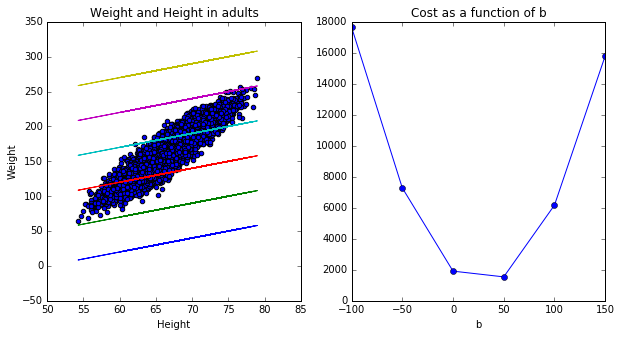

In [18]:
plt.figure(figsize=(10, 5))

# we are going to draw 2 plots in the same figure
# first plot, data and a few lines
ax1 = plt.subplot(121)
df.plot(kind = 'scatter',
        x = 'Height',
        y = 'Weight',
        title = 'Weight and Height in adults', ax=ax1)

# let's explore the cost function for a few values of b between -100 and +150
bbs = np.array([-100, -50, 0, 50, 100, 150])
mses = []  # we will append the values of the cost here, for each line
for b in bbs:
    y_pred = line(X, w = 2, b = b)
    mse = mean_squared_error(y_true, y_pred)
    mses.append(mse)
    plt.plot(X, y_pred)

# second plot: Cost function
ax2 = plt.subplot(122)
plt.plot(bbs, mses, 'o-')
plt.title('Cost as a function of b')
plt.xlabel('b')

## Linear Regression with Keras

In [19]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam, SGD

Using TensorFlow backend.


In [20]:
model = Sequential()

In [21]:
model.add(Dense(1, input_shape=(1,)))

In [22]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [23]:
model.compile(Adam(lr = 0.8), loss = 'mean_squared_error')

In [24]:
model.fit(X, y_true, epochs = 40)

Epoch 1/40
10000/10000 [==============================] - 0s - loss: 930.7508        
Epoch 2/40
10000/10000 [==============================] - 0s - loss: 557.1471     

In [25]:
y_pred = model.predict(X)

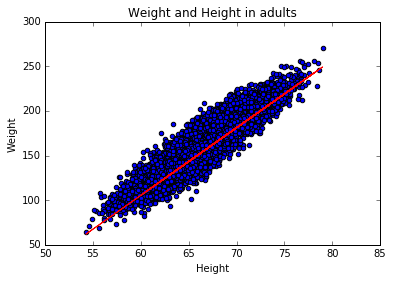

In [26]:
df.plot(kind = 'scatter',
        x = 'Height',
        y = 'Weight',
        title = 'Weight and Height in adults')
plt.plot(X, y_pred, color='red')

In [27]:
W, B = model.get_weights()

In [28]:
W

array([[ 7.56767607]], dtype=float32)

In [29]:
B

array([-348.63464355], dtype=float32)

## Evaluating Model Performance

In [30]:
from sklearn.metrics import r2_score

In [31]:
print("The R2 score is {:0.3f}".format(r2_score(y_true, y_pred)))

The R2 score is 0.795


### Train Test Split

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y_true,
                                                    test_size=0.2)

In [34]:
len(X_train)

8000

In [35]:
len(X_test)

2000

In [36]:
W[0, 0] = 0.0
B[0] = 0.0
model.set_weights((W, B))

In [37]:
model.fit(X_train, y_train, epochs = 50, verbose = 0)

In [38]:
y_train_pred = model.predict(X_train).ravel()
y_test_pred = model.predict(X_test).ravel()

In [39]:
from sklearn.metrics import mean_squared_error as mse

In [40]:
print("The Mean Squared Error on the Train set is:\t{:0.1f}".format(mse(y_train, y_train_pred)))
print("The Mean Squared Error on the Test set is:\t{:0.1f}".format(mse(y_test, y_test_pred)))

The Mean Squared Error on the Train set is:	150.1
The Mean Squared Error on the Test set is:	151.5


In [41]:
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred)))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_test_pred)))

The R2 score on the Train set is:	0.855
The R2 score on the Test set is:	0.850


# Classification

In [42]:
df = pd.read_csv('./data/user_visit_duration.csv')

In [43]:
df.head()

,Time (min),Buy
0,2.000000,0
1,0.683333,0
2,3.216667,1
3,0.900000,0
4,1.533333,1


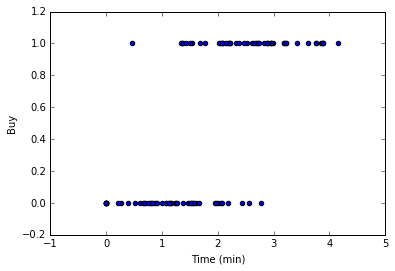

In [44]:
df.plot(kind = 'scatter', 
        x='Time (min)', 
        y='Buy')

In [45]:
model = Sequential()
model.add(Dense(1, input_shape=(1,), activation='sigmoid'))

In [46]:
model.compile(SGD(lr = 0.5), 
              loss = 'binary_crossentropy', 
              metrics=['accuracy'])

In [47]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [48]:
X = df[['Time (min)']].values
y = df['Buy'].values

model.fit(X, y, epochs = 25)

Epoch 1/25
100/100 [==============================] - 0s - loss: 0.6217 - acc: 0.5900     
Epoch 2/25
100/100 [==============================] - 0s - loss: 0.5992 - acc: 0.6100     
Epoch 3/25
100/100 [==============================] - 0s - loss: 0.5674 - acc: 0.6300     
Epoch 4/25
100/100 [==============================] - 0s - loss: 0.5899 - acc: 0.7000     
Epoch 5/25
100/100 [==============================] - 0s - loss: 0.5203 - acc: 0.7900     
Epoch 6/25
100/100 [==============================] - 0s - loss: 0.5268 - acc: 0.7500     

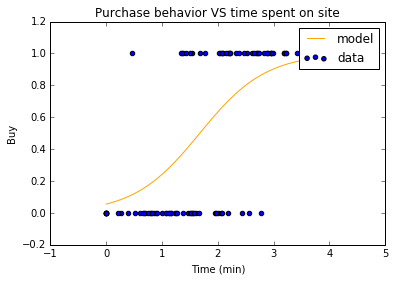

In [49]:
ax = df.plot(kind='scatter', 
             x = 'Time (min)', 
             y ='Buy',
             title = 'Purchase behavior VS time spent on site')

temp = np.linspace(0, 4)
ax.plot(temp, model.predict(temp), color = 'orange')
plt.legend(['model', 'data'])

In [50]:
temp_class = model.predict(temp) > 0.5

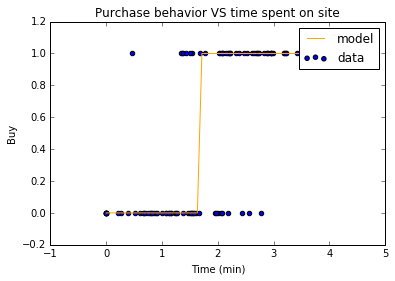

In [51]:
ax = df.plot(kind = 'scatter', 
             x = 'Time (min)', 
             y = 'Buy',
             title = 'Purchase behavior VS time spent on site')

temp = np.linspace(0, 4)
ax.plot(temp, temp_class, color = 'orange')
plt.legend(['model', 'data'])

In [52]:
y_pred = model.predict(X)
y_class_pred = y_pred > 0.5

In [53]:
from sklearn.metrics import accuracy_score

In [54]:
print("The accuracy score is {:0.3f}".format(accuracy_score(y, y_class_pred)))

The accuracy score is 0.840


### Train/Test split


In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [56]:
params = model.get_weights()
params = [np.zeros(w.shape) for w in params]
model.set_weights(params)

In [57]:
print("The accuracy score is {:0.3f}".format(accuracy_score(y, model.predict(X) > 0.5)))

The accuracy score is 0.500


In [58]:
model.fit(X_train, y_train, epochs = 25, verbose = 0)

In [59]:
print("The train accuracy score is {:0.3f}".format(accuracy_score(y_train, model.predict(X_train) > 0.5)))
print("The test accuracy score is {:0.3f}".format(accuracy_score(y_test, model.predict(X_test) > 0.5)))

The train accuracy score is 0.800
The test accuracy score is 0.850


## Cross Validation

In [60]:
from keras.wrappers.scikit_learn import KerasClassifier

In [61]:
def build_logistic_regression_model():
    model = Sequential()
    model.add(Dense(1, 
                    input_shape = (1,), 
                    activation = 'sigmoid'))
    model.compile(SGD(lr = 0.5),
                  loss = 'binary_crossentropy',
                  metrics = ['accuracy'])
    return model

In [62]:
model = KerasClassifier(build_fn = build_logistic_regression_model,
                        epochs = 25,
                        verbose = 0)

In [63]:
from sklearn.model_selection import cross_val_score, KFold

In [64]:
cv = KFold(3, shuffle = True)

In [65]:
scores = cross_val_score(model, X, y, cv = cv)

In [66]:
scores

array([ 0.73529412,  0.75757576,  0.87878788])

In [67]:
print("The cross validation accuracy is {:0.4f} ± {:0.4f}".format(scores.mean(), scores.std()))

The cross validation accuracy is 0.7906 ± 0.0631


## Confusion Matrix

In [68]:
from sklearn.metrics import confusion_matrix

In [69]:
confusion_matrix(y, y_class_pred)

array([[41,  9],
       [ 7, 43]])

In [70]:
def pretty_confusion_matrix(y_true, y_pred, labels = ["False", "True"]):
    cm = confusion_matrix(y_true, y_pred)
    pred_labels = ['Predicted '+ l for l in labels]
    df = pd.DataFrame(cm, index = labels, columns = pred_labels)
    return df

In [71]:
pretty_confusion_matrix(y, y_class_pred, ['Not Buy', 'Buy'])

,Predicted Not Buy,Predicted Buy
Not Buy,41,9
Buy,7,43


In [72]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [73]:
print("Precision:\t{:0.3f}".format(precision_score(y, y_class_pred)))
print("Recall:  \t{:0.3f}".format(recall_score(y, y_class_pred)))
print("F1 Score:\t{:0.3f}".format(f1_score(y, y_class_pred)))

Precision:	0.827
Recall:  	0.860
F1 Score:	0.843


In [74]:
from sklearn.metrics import classification_report

In [75]:
print(classification_report(y, y_class_pred))

             precision    recall  f1-score   support

          0       0.85      0.82      0.84        50
          1       0.83      0.86      0.84        50

avg / total       0.84      0.84      0.84       100



## Feature Preprocessing

### Categorical Features

In [76]:
df = pd.read_csv('./data/weight-height.csv')
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [77]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [78]:
pd.get_dummies(df['Gender'], prefix = 'Gender').head()

,Gender_Female,Gender_Male
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


## Feature Transformations

#### 1) Rescale with fixed factor

In [79]:
df['Height (feet)'] = df['Height']/12.0
df['Weight (100 lbs)'] = df['Weight']/100.0

In [80]:
df.describe().round(2)

,Height,Weight,Height (feet),Weight (100 lbs)
count,10000.00,10000.00,10000.00,10000.00
mean,66.37,161.44,5.53,1.61
std,3.85,32.11,0.32,0.32
min,54.26,64.70,4.52,0.65
25%,63.51,135.82,5.29,1.36
50%,66.32,161.21,5.53,1.61
75%,69.17,187.17,5.76,1.87
max,79.00,269.99,6.58,2.70


#### MinMax normalization

In [81]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
df['Weight_mms'] = mms.fit_transform(df[['Weight']])
df['Height_mms'] = mms.fit_transform(df[['Height']])
df.describe().round(2)

,Height,Weight,Height (feet),Weight (100 lbs),Weight_mms,Height_mms
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00
mean,66.37,161.44,5.53,1.61,0.47,0.49
std,3.85,32.11,0.32,0.32,0.16,0.16
min,54.26,64.70,4.52,0.65,0.00,0.00
25%,63.51,135.82,5.29,1.36,0.35,0.37
50%,66.32,161.21,5.53,1.61,0.47,0.49
75%,69.17,187.17,5.76,1.87,0.60,0.60
max,79.00,269.99,6.58,2.70,1.00,1.00


#### 3) Standard normalization

In [82]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
df['Weight_ss'] = ss.fit_transform(df[['Weight']])
df['Height_ss'] = ss.fit_transform(df[['Height']])
df.describe().round(2)

,Height,Weight,Height (feet),Weight (100 lbs),Weight_mms,Height_mms,Weight_ss,Height_ss
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00
mean,66.37,161.44,5.53,1.61,0.47,0.49,0.00,0.00
std,3.85,32.11,0.32,0.32,0.16,0.16,1.00,1.00
min,54.26,64.70,4.52,0.65,0.00,0.00,-3.01,-3.15
25%,63.51,135.82,5.29,1.36,0.35,0.37,-0.80,-0.74
50%,66.32,161.21,5.53,1.61,0.47,0.49,-0.01,-0.01
75%,69.17,187.17,5.76,1.87,0.60,0.60,0.80,0.73
max,79.00,269.99,6.58,2.70,1.00,1.00,3.38,3.28


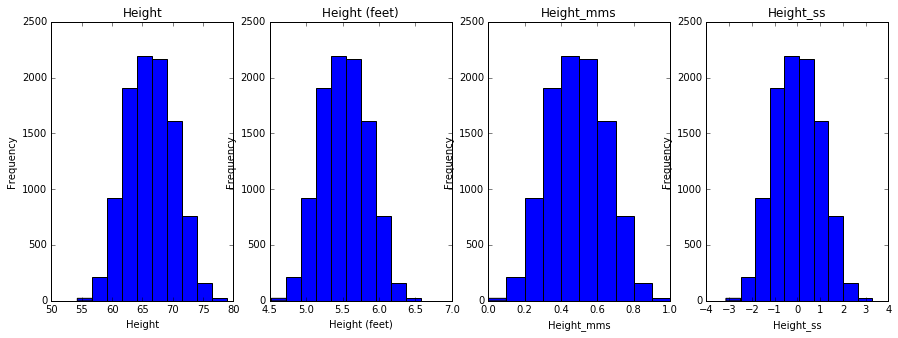

In [83]:
plt.figure(figsize=(15, 5))

for i, feature in enumerate(['Height', 'Height (feet)', 'Height_mms', 'Height_ss']):
    plt.subplot(1, 4, i+1)
    df[feature].plot(kind = 'hist', 
                     title = feature)
    plt.xlabel(feature)

# Machine Learning Exercises

## Exercise 1

You've just been hired at a real estate investment firm and they would like you to build a model for pricing houses. You are given a dataset that contains data for house prices and a few features like number of bedrooms, size in square feet and age of the house. Let's see if you can build a model that is able to predict the price. In this exercise we extend what we have learned about linear regression to a dataset with more than one feature. Here are the steps to complete it:

1. Load the dataset ../data/housing-data.csv
- plot the histograms for each feature
- create 2 variables called X and y: X shall be a matrix with 3 columns (sqft,bdrms,age) and y shall be a vector with 1 column (price)
- create a linear regression model in Keras with the appropriate number of inputs and output
- split the data into train and test with a 20% test size
- train the model on the training set and check its accuracy on training and test set
- how's your model doing? Is the loss growing smaller?
- try to improve your model with these experiments:
    - normalize the input features with one of the rescaling techniques mentioned above
    - use a different value for the learning rate of your model
    - use a different optimizer
- once you're satisfied with training, check the R2score on the test set

In [84]:
ex1 = pd.read_csv('./data/housing-data.csv')

In [85]:
ex1.head()

,sqft,bdrms,age,price
0,2104,3,70,399900
1,1600,3,28,329900
2,2400,3,44,369000
3,1416,2,49,232000
4,3000,4,75,539900


In [86]:
ex1.shape

(47, 4)

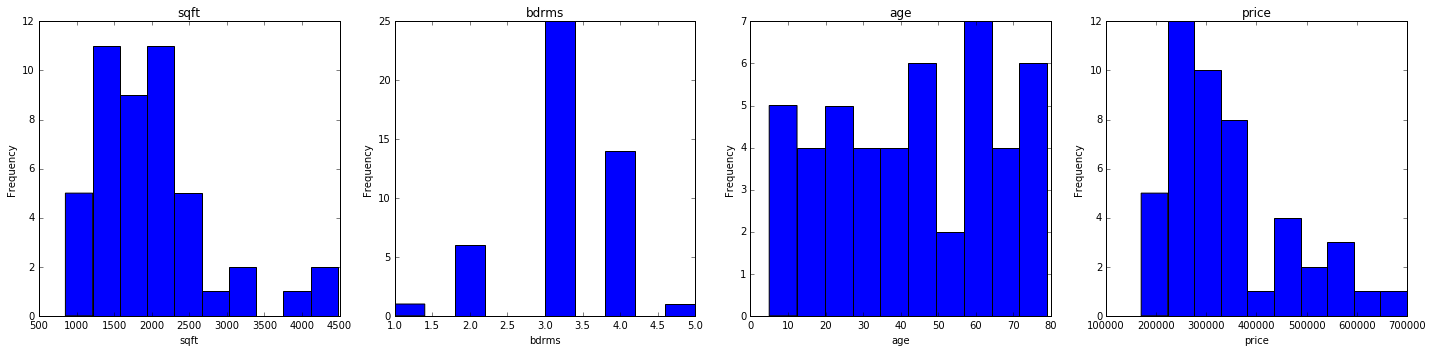

In [87]:
plt.figure(figsize=(20, 5))

for i, feature in enumerate(ex1.columns):
    plt.subplot(1, 4, i + 1)
    ex1[feature].plot(kind = 'hist',
                      title = feature)
    plt.xlabel(feature)
    plt.tight_layout()

In [88]:
X = ex1[['sqft', 'bdrms', 'age']]
X.head()

,sqft,bdrms,age
0,2104,3,70
1,1600,3,28
2,2400,3,44
3,1416,2,49
4,3000,4,75


In [89]:
Y = ex1[['price']]
Y.head()

,price
0,399900
1,329900
2,369000
3,232000
4,539900


In [90]:
X = X.values
Y = Y.values

In [91]:
X.shape

(47, 3)

In [92]:
Y.shape

(47, 1)

In [93]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD, Adam

In [94]:
model = Sequential()

In [95]:
model.add(Dense(1, input_shape = (3, )))

In [96]:
opt = Adam(lr = 0.8)

In [97]:
model.compile(optimizer = opt, loss = 'mean_squared_error')

In [98]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 1)                 4         
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [99]:
from sklearn.model_selection import train_test_split

In [100]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [101]:
model.fit(X_train, Y_train, epochs = 10)

Epoch 1/10
37/37 [==============================] - 0s - loss: 126081951688.6487     
Epoch 2/10
37/37 [==============================] - 0s - loss: 123794320854.4865     
Epoch 3/10
37/37 [==============================] - 0s - loss: 121551407159.3513     
Epoch 4/10
37/37 [==============================] - 0s - loss: 119271369091.4594     
Epoch 5/10
37/37 [==============================] - 0s - loss: 116997365981.4054     
Epoch 6/10
37/37 [==============================] - 0s - loss: 114896879837.4054     
Epoch 7/10
37/37 [======================

In [102]:
from sklearn.metrics import r2_score

In [103]:
Y_train_predicted = model.predict(X_train)
Y_test_predicted = model.predict(X_test)

train_score = r2_score(Y_train, Y_train_predicted)
test_score = r2_score(Y_test, Y_test_predicted)

print('Train set score: \t{:0.3f}'.format(train_score))
print('Test set score: \t{:0.3f}'.format(test_score))

Train set score: 	-6.572
Test set score: 	-4.996


## MinMaxScaler

In [104]:
from sklearn.preprocessing import MinMaxScaler

In [105]:
minmax = MinMaxScaler()

In [106]:
X = minmax.fit_transform(X)
Y = minmax.fit_transform(Y)

/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, _DataConversionWarning)


In [107]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [108]:
model = Sequential()
model.add(Dense(1, input_shape = (3, )))
opt = Adam(lr = 0.8)
model.compile(optimizer = opt, loss = 'mean_squared_error')

In [109]:
model.fit(X_train, Y_train, epochs = 20)

Epoch 1/20
37/37 [==============================] - 0s - loss: 0.5628     
Epoch 2/20
37/37 [==============================] - 0s - loss: 0.2645     
Epoch 3/20
37/37 [==============================] - 0s - loss: 1.2662     
Epoch 4/20
37/37 [==============================] - 0s - loss: 0.2011     
Epoch 5/20
37/37 [==============================] - 0s - loss: 0.3728     
Epoch 6/20
37/37 [==============================] - 0s - loss: 0.3402     
Epoch 7/20
37/37 [==============================] - 0s - loss: 0.0775     
Epoch 8/20
37/37 [================

In [110]:
Y_train_predicted = model.predict(X_train)
Y_test_predicted = model.predict(X_test)

train_score = r2_score(Y_train, Y_train_predicted)
test_score = r2_score(Y_test, Y_test_predicted)

print('Train set score: \t{:0.3f}'.format(train_score))
print('Test set score: \t{:0.3f}'.format(test_score))

Train set score: 	0.636
Test set score: 	0.623


## Lowering the learning rate

In [111]:
model = Sequential()
model.add(Dense(1, input_shape = (3, )))
opt = Adam(lr = 0.1)
model.compile(optimizer = opt, loss = 'mean_squared_error')

In [112]:
model.fit(X_train, Y_train, epochs = 20, verbose = 1)

Epoch 1/20
37/37 [==============================] - 0s - loss: 0.4131     
Epoch 2/20
37/37 [==============================] - 0s - loss: 0.0867     
Epoch 3/20
37/37 [==============================] - 0s - loss: 0.1544     
Epoch 4/20
37/37 [==============================] - 0s - loss: 0.2154     
Epoch 5/20
37/37 [==============================] - 0s - loss: 0.1397     
Epoch 6/20
37/37 [==============================] - 0s - loss: 0.0660     
Epoch 7/20
37/37 [==============================] - 0s - loss: 0.0632     
Epoch 8/20
37/37 [================

In [113]:
Y_train_predicted = model.predict(X_train)
Y_test_predicted = model.predict(X_test)

train_score = r2_score(Y_train, Y_train_predicted)
test_score = r2_score(Y_test, Y_test_predicted)

print('Train set score: \t{:0.3f}'.format(train_score))
print('Test set score: \t{:0.3f}'.format(test_score))

Train set score: 	0.724
Test set score: 	0.685


## Using SGD

In [114]:
model = Sequential()
model.add(Dense(1, input_shape = (3, )))
opt = SGD(lr = 0.1)
model.compile(optimizer = opt, loss = 'mean_squared_error')

In [115]:
model.fit(X_train, Y_train, epochs = 20)

Epoch 1/20
37/37 [==============================] - 0s - loss: 0.1078     
Epoch 2/20
37/37 [==============================] - 0s - loss: 0.0953     
Epoch 3/20
37/37 [==============================] - 0s - loss: 0.0971     
Epoch 4/20
37/37 [==============================] - 0s - loss: 0.0920     
Epoch 5/20
37/37 [==============================] - 0s - loss: 0.0820     
Epoch 6/20
37/37 [==============================] - 0s - loss: 0.0793     
Epoch 7/20
37/37 [==============================] - 0s - loss: 0.0783     
Epoch 8/20
37/37 [================

In [116]:
Y_train_predicted = model.predict(X_train)
Y_test_predicted = model.predict(X_test)

train_score = r2_score(Y_train, Y_train_predicted)
test_score = r2_score(Y_test, Y_test_predicted)

print('Train set score: \t{:0.3f}'.format(train_score))
print('Test set score: \t{:0.3f}'.format(test_score))

Train set score: 	-0.024
Test set score: 	0.062


## Exercise 2

Your boss was extremely happy with your work on the housing price prediction model and decided to entrust you with a more challenging task. They've seen a lot of people leave the company recently and they would like to understand why that's happening. They have collected historical data on employees and they would like you to build a model that is able to predict which employee will leave next. The would like a model that is better than random guessing. They also prefer false negatives than false positives, in this first phase. Fields in the dataset include:

- Employee satisfaction level
- Last evaluation
- Number of projects
- Average monthly hours
- Time spent at the company
- Whether they have had a work accident
- Whether they have had a promotion in the last 5 years
- Department
- Salary
- Whether the employee has left

Your goal is to predict the binary outcome variable `left` using the rest of the data. Since the outcome is binary, this is a classification problem. Here are some things you may want to try out:

1. load the dataset at ../data/HR_comma_sep.csv, inspect it with `.head()`, `.info()` and `.describe()`.
- Establish a benchmark: what would be your accuracy score if you predicted everyone stay?
- Check if any feature needs rescaling. You may plot a histogram of the feature to decide which rescaling method is more appropriate.
- convert the categorical features into binary dummy columns. You will then have to combine them with the numerical features using `pd.concat`.
- do the usual train/test split with a 20% test size
- play around with learning rate and optimizer
- check the confusion matrix, precision and recall
- check if you still get the same results if you use a 5-Fold cross validation on all the data
- Is the model good enough for your boss?

As you will see in this exercise, the a logistic regression model is not good enough to help your boss. In the next chapter we will learn how to go beyond linear models.

This dataset comes from https://www.kaggle.com/ludobenistant/hr-analytics/ and is released under [CC BY-SA 4.0 License](https://creativecommons.org/licenses/by-sa/4.0/).

In [117]:
ex2 = pd.read_csv('./data/HR_comma_sep.csv')

In [118]:
ex2.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [119]:
ex2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.3+ MB


In [120]:
ex2.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [121]:
# Accuracy if predicted that all stay 
# left = 1 : the employee already left
acc = (1 - (ex2['left'].value_counts()[1] / ex2.shape[0])) * 100
print('Predicting all would stay yields accuracy: \t{:0.2f} %'.format(acc))

Predicting all would stay yields accuracy: 	76.19 %


In [122]:
len(ex2.columns)

10

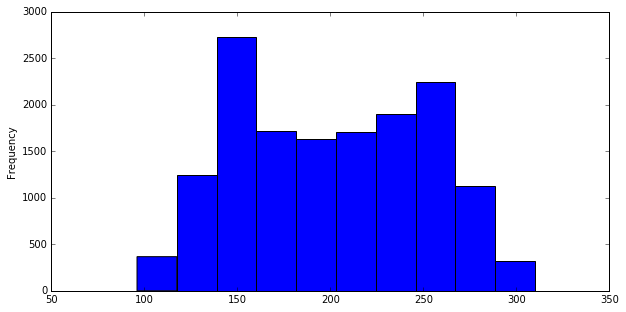

In [123]:
ex2['average_montly_hours'].plot(kind = 'hist', 
                                 figsize = (10, 5))

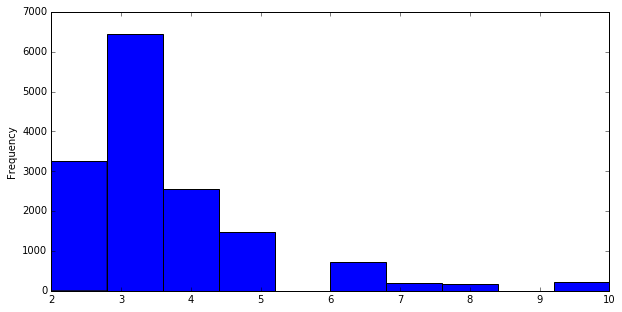

In [124]:
ex2['time_spend_company'].plot(kind = 'hist', 
                                 figsize = (10, 5))

In [125]:
minmax = MinMaxScaler()

In [126]:
ex2['average_montly_hours'] = minmax.fit_transform(ex2['average_montly_hours'].reshape(-1,1))
ex2['time_spend_company'] = minmax.fit_transform(ex2['time_spend_company'].reshape(-1,1))

/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, _DataConversionWarning)


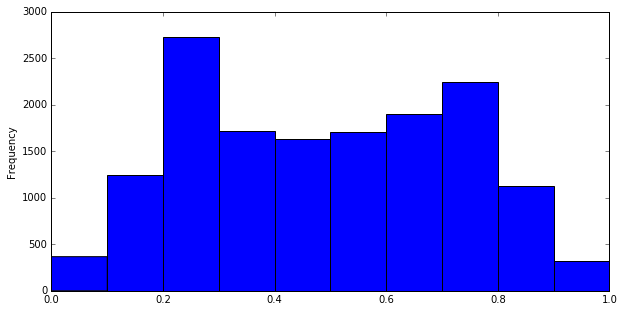

In [127]:
ex2['average_montly_hours'].plot(kind = 'hist', 
                                 figsize = (10, 5))

In [128]:
# Sales and salary are categorical data
ex2_dummies = pd.get_dummies(ex2[['sales', 'salary']])

In [129]:
ex2_dummies.head()

,sales_IT,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_high,salary_low,salary_medium
0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0,0,0,0,0,0,0,1,0,0,0,1,0


In [130]:
del ex2['sales'], ex2['salary']

In [131]:
ex2.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
0,0.38,0.53,2,0.285047,0.125,0,1,0
1,0.80,0.86,5,0.775701,0.500,0,1,0
2,0.11,0.88,7,0.822430,0.250,0,1,0
3,0.72,0.87,5,0.593458,0.375,0,1,0
4,0.37,0.52,2,0.294393,0.125,0,1,0


In [132]:
len(ex2.columns)

8

In [133]:
data = pd.concat([ex2, ex2_dummies], axis = 1)

In [134]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales_IT,sales_RandD,...,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,0.285047,0.125,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,0.775701,0.500,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,0.822430,0.250,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,0.593458,0.375,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,0.294393,0.125,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [135]:
X = data.ix[:, data.columns != 'left']

In [136]:
X.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sales_IT,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,0.285047,0.125,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,0.775701,0.500,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,0.822430,0.250,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,0.593458,0.375,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,0.294393,0.125,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [137]:
len(X.columns)

20

In [138]:
Y = data['left']

In [139]:
from sklearn.model_selection import train_test_split

In [140]:
X = X.values
Y = Y.values

In [141]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [142]:
model = Sequential()
model.add(Dense(1, input_dim = X_train.shape[1], activation = 'sigmoid'))
model.compile(optimizer = Adam(lr = 0.05), loss = 'binary_crossentropy', metrics = ['accuracy'])

In [143]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 1)                 21        
Total params: 21
Trainable params: 21
Non-trainable params: 0
_________________________________________________________________


In [144]:
model.fit(X_train, Y_train, epochs = 20)

Epoch 1/20
11999/11999 [==============================] - 1s - loss: 0.4806 - acc: 0.7661      

In [145]:
Y_test_predicted = model.predict_classes(X_test)

2304/3000 [======================>.......] - ETA: 0s 

In [146]:
from sklearn.metrics import confusion_matrix, classification_report

In [147]:
def pretty_confusion_matrix(y_true, y_pred, labels=["False", "True"]):
    cm = confusion_matrix(y_true, y_pred)
    pred_labels = ['Predicted '+ l for l in labels]
    df = pd.DataFrame(cm, index = labels, columns = pred_labels)
    return df

In [148]:
pretty_confusion_matrix(Y_test, Y_test_predicted, labels=['Stay', 'Leave'])

,Predicted Stay,Predicted Leave
Stay,2075,197
Leave,483,245


In [149]:
print(classification_report(Y_test, Y_test_predicted))

             precision    recall  f1-score   support

          0       0.81      0.91      0.86      2272
          1       0.55      0.34      0.42       728

avg / total       0.75      0.77      0.75      3000



In [150]:
from sklearn.model_selection import cross_val_score, KFold

In [151]:
from keras.wrappers.scikit_learn import KerasClassifier

In [152]:
def build_model():
    model = Sequential()
    model.add(Dense(1, 
                    input_dim = 20, 
                    activation='sigmoid'))
    model.compile(Adam(lr = 0.1), 'binary_crossentropy', metrics=['accuracy'])
    return model

In [153]:
model = KerasClassifier(build_fn = build_model, 
                        epochs = 10, 
                        verbose = 0)

In [154]:
from sklearn.model_selection import KFold, cross_val_score

In [155]:
cross_val = KFold(5, shuffle = True)

In [156]:
scores = cross_val_score(model, X, Y, cv = cross_val)

In [157]:
print("The cross validation accuracy is {:0.4f} ± {:0.4f}".format(scores.mean(), scores.std()))

The cross validation accuracy is 0.7789 ± 0.0111


In [158]:
scores

array([ 0.79466667,  0.77633333,  0.76333333,  0.77233333,  0.78759587])

The linear model is not sufficient!